# Challenge 5: Real Estate Price Estimator
- **Challenge**: Develop a model to estimate the market value of real estate properties based on their characteristics.
- **Deliverables**: A Jupyter Notebook with data wrangling, exploratory analysis, regression model(s), and a comparison of model accuracy. A presentation detailing the model's features and its potential use in real estate valuation.
- **Data Source**: "Ames Housing Dataset" from Kaggle.

# 1. Obtain the Dataset
The Ames Housing Dataset is a well-known dataset in the field of machine learning and data analysis. It contains various features and attributes of residential homes in Ames, Iowa, USA. The dataset is often used for regression tasks, particularly for predicting housing prices.

You can download this dataset from https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset

In [1]:
# hint: install Pyarrow library with "pip" to avoid the deprecation warning
import pandas as pd

# read the CSV file using pandas library to create a new dataframe (df)
df = pd.read_csv("AmesHousing.csv")

# duplicate the df to avoid the warning "A value is trying to be set on a copy of a slice from a DataFrame."
df = df.copy()

# print dataframe shape
print (df.shape)

#show top 10 data
df.head(10)

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


# 2. Data Cleaning
Before we can use the data, we need to preprocess it. This typically involves handling missing values, encoding categorical variables, and creating the RFM features.

In [2]:
# Check the columns data types. Are they all correct?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [3]:
# Data exploration: how many "Null" rows do we have? And Where?
pd.set_option('display.max_rows', None) # needed to display all columns
df.isnull().sum().sort_values(ascending=False)

Pool QC            2917
Misc Feature       2824
Alley              2732
Fence              2358
Mas Vnr Type       1775
Fireplace Qu       1422
Lot Frontage        490
Garage Cond         159
Garage Finish       159
Garage Yr Blt       159
Garage Qual         159
Garage Type         157
Bsmt Exposure        83
BsmtFin Type 2       81
Bsmt Qual            80
Bsmt Cond            80
BsmtFin Type 1       80
Mas Vnr Area         23
Bsmt Full Bath        2
Bsmt Half Bath        2
BsmtFin SF 1          1
Garage Cars           1
Electrical            1
Total Bsmt SF         1
Bsmt Unf SF           1
BsmtFin SF 2          1
Garage Area           1
Paved Drive           0
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
TotRms AbvGrd         0
Sale Condition        0
Sale Type             0
Yr Sold               0
Mo Sold               0
Misc Val              0
Functional            0
Fireplaces            0
Pool Area       

In [4]:
# Handle missing values

# Linear Regression does not accept missing values, so please replace missing values with 0 
df.fillna(0, inplace=True)

# 3. Data Exploration
Here are some suggested metrics to visualize:
- 3.1) Summary Statistics
- 3.2) 
Correlation Matri.- 3.3) 
Distribution of Sale Price- 3.4) S
Scatter Pot.

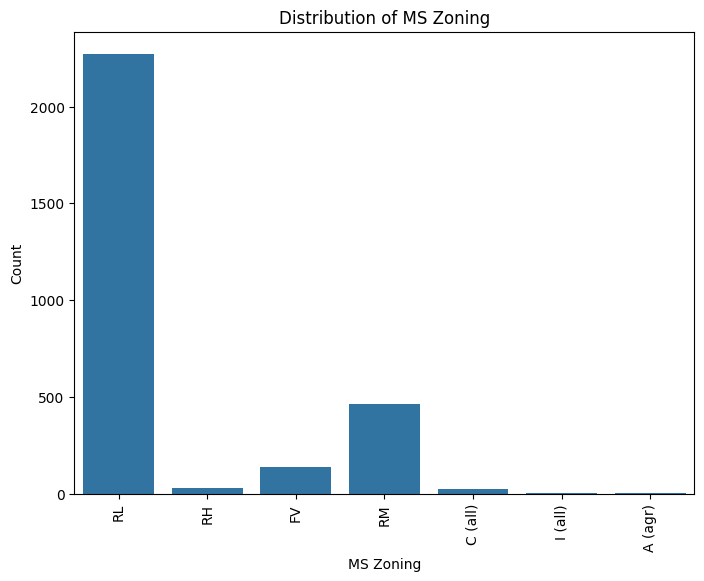

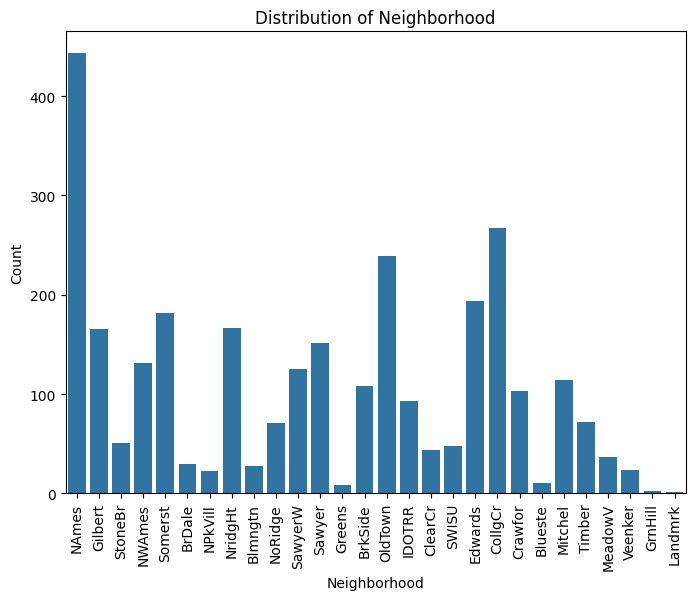

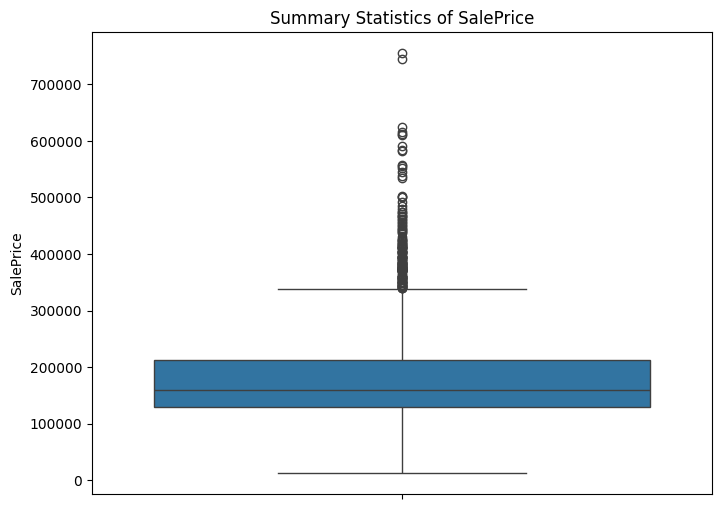

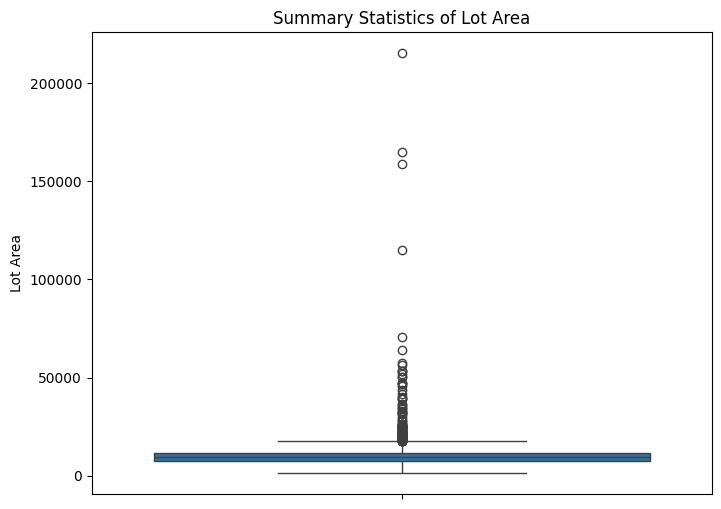

In [5]:
# 3.1) Summary Statistics:  
# This task involves visualizing the summary statistics of the main columns in the dataset. You can create bar plots or box plots to show 
# statistics such as mean, median, minimum, maximum, and quartiles for numerical columns like "SalePrice", "Lot Area", etc. 
# For categorical columns like "MS Zoning", "Neighborhood", etc., you can create bar plots to show the distribution of different categories.

import matplotlib.pyplot as plt
import seaborn as sns 

# Bar Plots for Categorical Columns:
# - Select the categorical columns you want to visualize, such as "MS Zoning" and "Neighborhood".
# - Count the occurrences of each category in the column.
# - Create a bar plot using a library like matplotlib or seaborn to show the distribution of different categories.
# - Label the x-axis with the column names and the y-axis with the count or percentage of occurrences.
# Categorical columns  
categorical_cols = ["MS Zoning", "Neighborhood"]  
for col in categorical_cols:  
    plt.figure(figsize=(8, 6))  
    sns.countplot(data=df, x=col)  
    plt.xlabel(col)  
    plt.ylabel("Count")  
    plt.title(f"Distribution of {col}")  
    plt.xticks(rotation=90)  
    plt.show()


# Numerical columns  
numerical_cols = ["SalePrice", "Lot Area"]  
for col in numerical_cols:  
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, y=col)  
    plt.ylabel(col)  
    plt.title(f"Summary Statistics of {col}")  
    plt.show()  

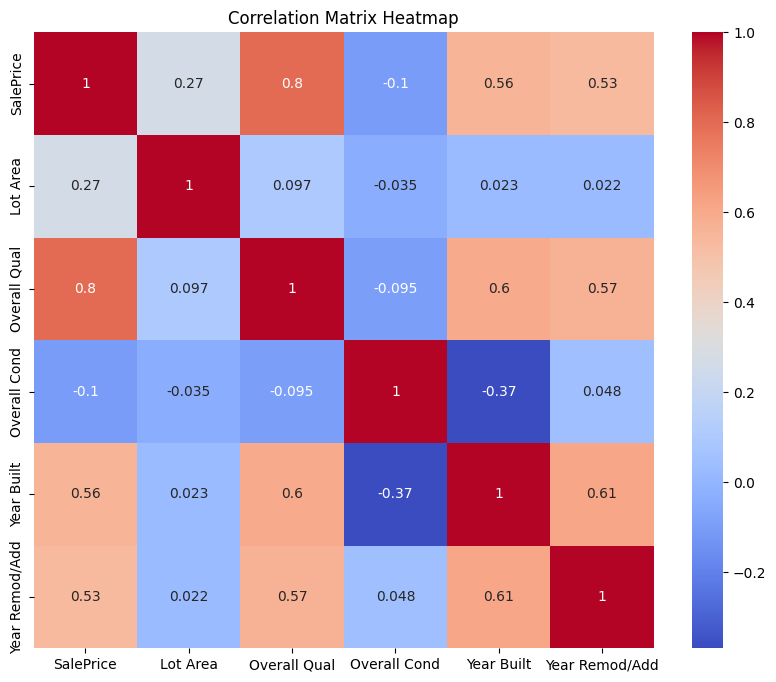

In [6]:
# 3.2) Correlation Matrix: Create a correlation matrix heatmap to visualize the correlation between different numerical columns. 
# This will help identify the variables that have a strong positive or negative correlation with the target variable "SalePrice". 
# You can use a library like seaborn or matplotlib to create this visualization.

import seaborn as sns
import matplotlib.pyplot as plt
  
# Select the numerical columns you want to include in the correlation matrix
numerical_cols = ["SalePrice", "Lot Area", "Overall Qual", "Overall Cond", "Year Built", "Year Remod/Add"]
  
# Create a correlation matrix
correlation_matrix = df[numerical_cols].corr()
  
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

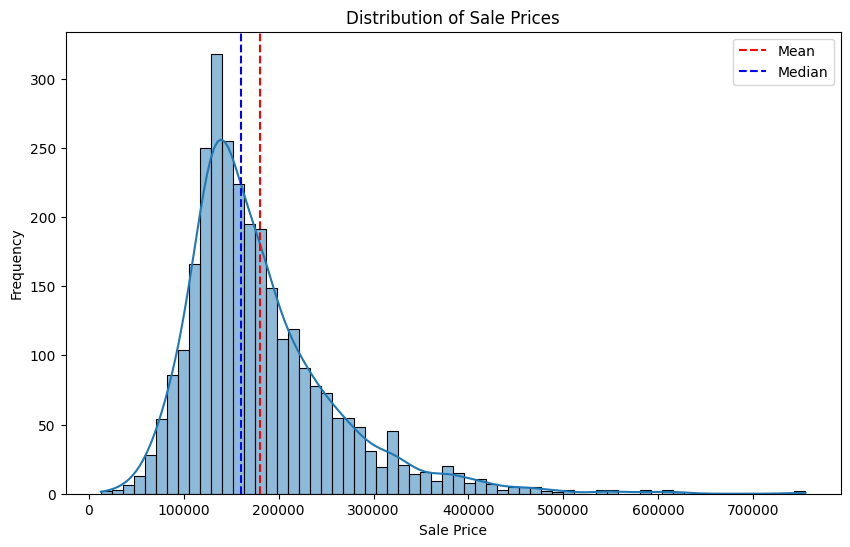

In [7]:
# 3.3) Distribution of Sale Prices: Create a histogram or a density plot to visualize the distribution of sale prices. 
# This will help you understand the range of sale prices and if there are any outliers. 
# You can also add a vertical line to represent the mean or median sale price.

import matplotlib.pyplot as plt  
import seaborn as sns  
  
# Select the "SalePrice" column  
sale_prices = df["SalePrice"]  
  
# Create a histogram using matplotlib or seaborn  
plt.figure(figsize=(10, 6))  
sns.histplot(sale_prices, kde=True)  
plt.xlabel("Sale Price")  
plt.ylabel("Frequency")  
plt.title("Distribution of Sale Prices")  
plt.axvline(sale_prices.mean(), color='red', linestyle='--', label="Mean")  
plt.axvline(sale_prices.median(), color='blue', linestyle='--', label="Median")  
plt.legend()  
plt.show()  

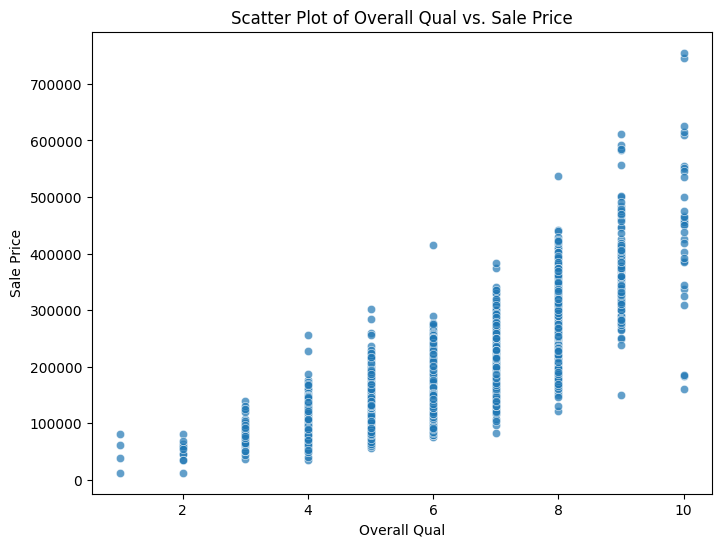

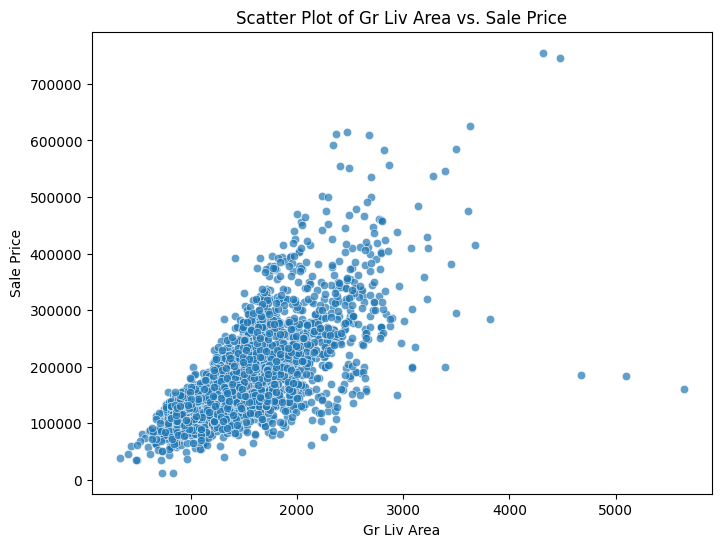

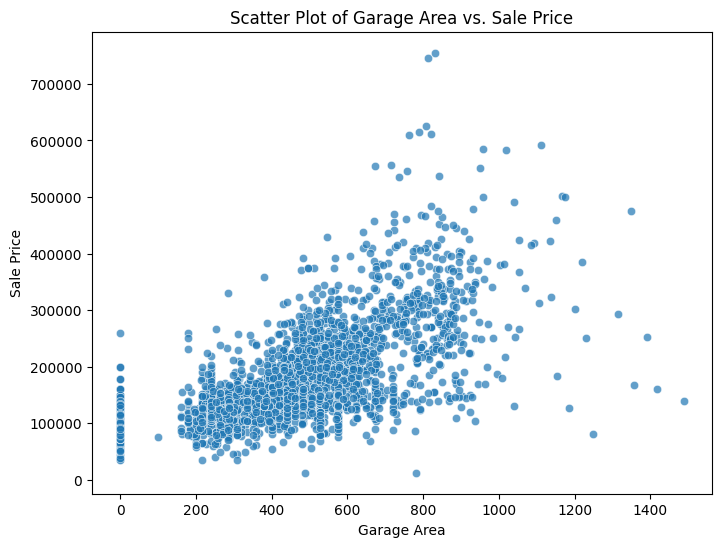

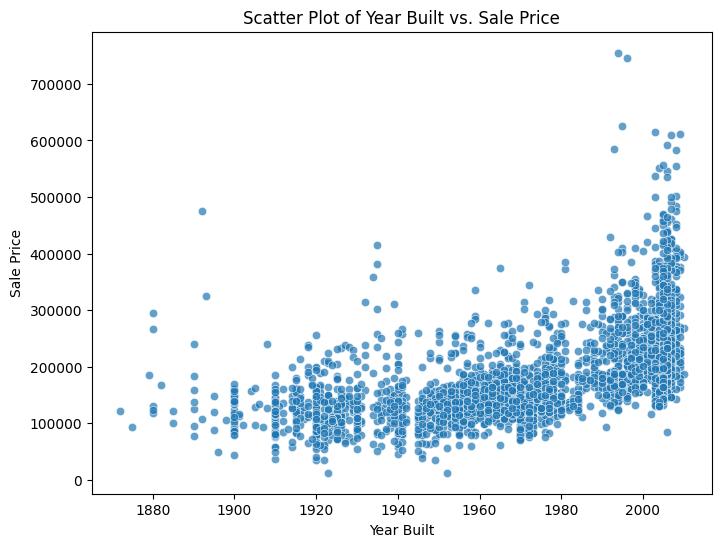

In [8]:
# 4) Scatter Plot: Create scatter plots to visualize the relationship between the target variable "SalePrice" and other numerical variables 
# that you think might be important predictors. This will help you identify any linear or non-linear relationships between variables 
# and the target variable. You can use different colors or markers to represent different categories 
# if there are any categorical variables that you want to include in the plot.

import matplotlib.pyplot as plt  
import seaborn as sns  
  
# Select the numerical columns you want to include in the scatter plot  
numerical_cols = ["Overall Qual", "Gr Liv Area", "Garage Area", "Year Built"]  
  
# Create scatter plots using matplotlib or seaborn  
for col in numerical_cols:  
    plt.figure(figsize=(8, 6))  
    sns.scatterplot(data=df, x=col, y="SalePrice", alpha=0.7)  
    plt.xlabel(col)  
    plt.ylabel("Sale Price")  
    plt.title(f"Scatter Plot of {col} vs. Sale Price")  
    plt.show()

## 4. Building a Machine Learning Regression Model
- 4.1 Create and fill two variables: features and label
- 4.2 Training and Test Dataset Split
- 4.3 Use the Random Forest classifier Algorithm to Build the Model

In [9]:
# 4.1 Create and fill two variables: features and label
# features: 'Overall Qual', 'Lot Area', 'Year Built', 'Total Bsmt SF', 'Gr Liv Area', 'Full Bath', 'Garage Cars' 
# label = "SalePrice"  # Assuming "Target" is the binary classification target variable

features = ['Overall Qual', 'Lot Area', 'Year Built', 'Total Bsmt SF', 'Gr Liv Area', 'Full Bath', 'Garage Cars']
label = 'SalePrice'
X = df[features]
y = df[label]

In [10]:
# 4.2 Training and Test Dataset Split

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2, random_state=42)

[d.shape for d in (X_train, X_test, y_train, y_test)]

[(2344, 7), (586, 7), (2344,), (586,)]

In [11]:
# 4.3 Use the Linear Regression Algorithm to Build the Model

from sklearn.linear_model import LinearRegression

# Create an instance of the linear regression model:
model = LinearRegression()  

# Fit the model to the training data:
model.fit(X_train, y_train)  

LinearRegression()

## 5. Score the Model

In [12]:
# Make predictions on the test set  
y_pred = model.predict(X_test)  
y_pred

array([191112.23914121, 128213.28786444, 214967.10209929,  96010.71961181,
       118674.79297221, 190635.56701024, 204060.22047357, 166746.85842412,
        61407.87398421, 321915.96197295, 239964.03364773, 243520.01176795,
        88993.13672707, 183471.42022836,  94241.5096324 , 159192.62795823,
       166106.12369596, 217090.80395244, 136071.9743053 , 154758.89186791,
       217271.70878253, 140650.58247295, 198327.55071672, 226013.47362421,
       215908.17535256, 294671.98512211, 328837.94777829, 226575.77159375,
       219338.74269796, 221140.93648123, 208260.14947101,  63485.03830161,
       255496.05970553,  98716.85756739, 149706.76883178,  90833.44572137,
       208856.74784569, 273794.49229942, 201280.04029476, 231052.60605887,
       328520.35948956, 214683.75374787, 221939.5457032 , 195327.08644149,
        92308.76827964, 301706.74597961, 186546.02823119, 154957.73359084,
       154344.24887125, 114919.16325477, 204623.13563432, 116315.73102005,
       145581.58341295, 2

## 6. Evaluate the Model 

In [13]:
# Evaluate the model

# Calculate and print the man absolute error (MAE) and coefficient of determination (R-squared):

import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score  

mae = np.sqrt(mean_absolute_error(y_test, y_pred))  
r2 = r2_score(y_test, y_pred)  
print('MAE:', mae)  
print('R-squared:', r2)  

MAE: 158.512282226282
R-squared: 0.8011701774733486
